In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the CSV file with the correct encoding (latin1 to avoid Unicode errors)
df = pd.read_csv("spam.csv", encoding="latin1")

# Keep only the first two columns (label and message)
df = df.iloc[:, :2]

# Rename the columns to meaningful names
df.columns = ["label", "text"]

df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(403)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(5169, 2)

In [9]:
# show number of unique values in each column and their datatypes
dtypes=df.dtypes
nuniq=df.nunique()
pd.DataFrame({'dtypes':dtypes,'nunique':nuniq}).T

,label,text
dtypes,object,object
nunique,2,5169


In [10]:
#convert some columns into category datatype
col=["label"]
df[col]=df[col].astype('category')
pd.DataFrame(df.dtypes).T

,label,text
0,category,object


In [11]:
# Convert labels to 0/1
df["label"] = df["label"].map({"ham": 0, "spam": 1})

In [12]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Convert all text to lowercase
df["text"] = df["text"].str.lower()

df[["label", "text"]].head()

,label,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [14]:
import string

# Remove punctuation from text
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

df[["label", "text"]].head()

,label,text
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [15]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

from nltk.tokenize import word_tokenize

# Tokenize the text
df["text"] = df["text"].apply(word_tokenize)

df[["label", "text"]].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,label,text
0,0,"[go, until, jurong, point, crazy, available, o..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"[nah, i, dont, think, he, goes, to, usf, he, l..."


In [16]:
nltk.download("stopwords")
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Remove stopwords from tokens
df["text"] = df["text"].apply(lambda x: [word for word in x if word not in stop_words])

df[["label", "text"]].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,text
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [17]:
# Remove numbers from tokens
df["text"] = df["text"].apply(lambda x: [word for word in x if not word.isdigit()])

df[["label", "text"]].head()

,label,text
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, goes, usf, lives, around, t..."


In [18]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download("wordnet")
nltk.download("omw-1.4")

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply Lemmatization on tokenized lists
df["text"] = df["text"].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Show the updated dataframe
df[["label", "text"]].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,label,text
0,0,"[go, jurong, point, crazy, available, bugis, n..."
1,0,"[ok, lar, joking, wif, u, oni]"
2,1,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,0,"[u, dun, say, early, hor, u, c, already, say]"
4,0,"[nah, dont, think, go, usf, life, around, though]"


In [19]:
# Join tokens back to single string for vectorizers
df["text"] = df["text"].apply(lambda tokens: " ".join(tokens))

In [20]:
nltk.download("averaged_perceptron_tagger")

# Create a new column for POS tags without modifying original text
df["pos_tags"] = df["text"].apply(lambda x: nltk.pos_tag(x.split()))

df[["text", "pos_tags"]].head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text,pos_tags
0,go jurong point crazy available bugis n great ...,"[(go, VB), (jurong, JJ), (point, NN), (crazy, ..."
1,ok lar joking wif u oni,"[(ok, JJ), (lar, JJ), (joking, NN), (wif, NN),..."
2,free entry wkly comp win fa cup final tkts 21s...,"[(free, JJ), (entry, NN), (wkly, VBD), (comp, ..."
3,u dun say early hor u c already say,"[(u, JJ), (dun, NNS), (say, VBP), (early, JJ),..."
4,nah dont think go usf life around though,"[(nah, JJ), (dont, NN), (think, VBP), (go, VB)..."


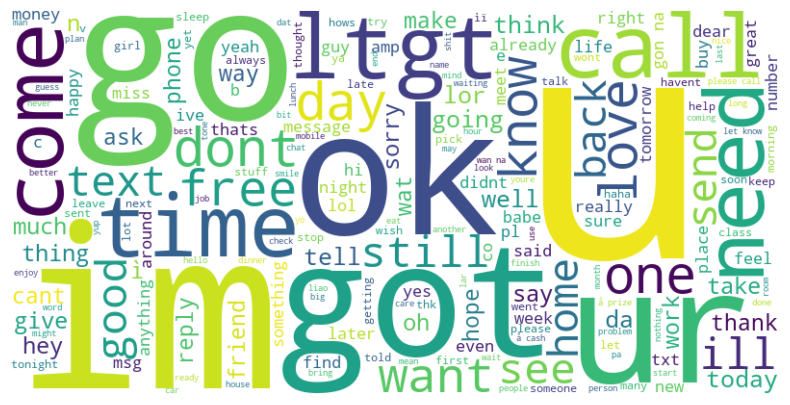

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all messages into a single string
all_text = " ".join(df["text"])

# Generate a word cloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Bag of Words (BoW) 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df["text"])

print(X_bow.shape)  # (num_messages, num_unique_words)

(5169, 8321)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# This will transform the text into numerical features
tfidf = TfidfVectorizer()

# Fit the vectorizer on the "text" column and transform it into a sparse matrix
X_tfidf = tfidf.fit_transform(df["text"])

# Print the shape of the matrix -> (number of rows, number of unique words)
print(X_tfidf.shape)


(5169, 8321)


In [24]:
import spacy
#word embeddings
# Load spaCy English model with word vectors
nlp = spacy.load("en_core_web_md")

# Replace text column with embeddings (numerical vector)
df["text_vector"] = df["text"].apply(lambda x: nlp(x).vector)

# Show shape of first vector
df["text_vector"].iloc[0].shape

(300,)

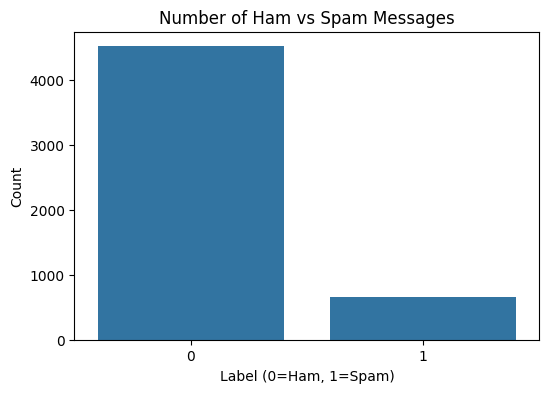

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for label distribution
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df)
plt.title("Number of Ham vs Spam Messages")
plt.xlabel("Label (0=Ham, 1=Spam)")
plt.ylabel("Count")
plt.show()

In [26]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Convert series of text embeddings to a 2D numpy array
X = np.stack(df["text_vector"].values)
y = df["label"].values

# Apply SMOTE to balance the classes
# This generates synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print class distribution before and after SMOTE
print("Before SMOTE:", np.bincount(y))
print("After SMOTE:", np.bincount(y_resampled))

Before SMOTE: [4516  653]
After SMOTE: [4516 4516]


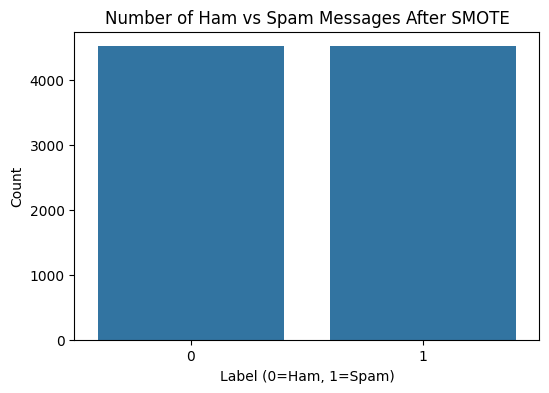

In [27]:

# Create a DataFrame from y_res (resampled labels)
df_resampled = pd.DataFrame({'label': y_resampled})

# Count plot to check if classes are balanced after SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df_resampled)
plt.title("Number of Ham vs Spam Messages After SMOTE")
plt.xlabel("Label (0=Ham, 1=Spam)")
plt.ylabel("Count")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler for normalization
scaler = StandardScaler()

# Fit the scaler on the resampled data and transform
X_rescaled = scaler.fit_transform(X_resampled)


In [29]:
from sklearn.model_selection import train_test_split

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_rescaled,         # Features after SMOTE
    y_resampled,         # Labels after SMOTE
    test_size=0.2, # 20% data for testing
    random_state=42,
    stratify=y_resampled # Keep class balance in both train and test
)

# Print the shapes to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:", np.bincount(y_train))
print("y_test distribution:", np.bincount(y_test))

X_train shape: (7225, 300)
X_test shape: (1807, 300)
y_train distribution: [3612 3613]
y_test distribution: [904 903]


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Ensure pandas shows all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Define all models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=10, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Perceptron": Perceptron(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42),
}

# List to store classification reports
report_list = []

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Print Accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    
    # Classification report for test set
    report_dict = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Convert dict to DataFrame
    df_report = pd.DataFrame(report_dict).T.reset_index()
    df_report.rename(columns={'index': 'metric'}, inplace=True)
    df_report['model'] = name  # Add model name
    
    report_list.append(df_report)

# Combine all reports into a single DataFrame for comparison
report_df = pd.concat(report_list, ignore_index=True)

# Display comparison table fully
print("\n--- Classification Report Comparison ---")
print(report_df)


--- Decision Tree ---
Train Accuracy: 0.9837
Test Accuracy: 0.9247

--- Random Forest ---
Train Accuracy: 0.9917
Test Accuracy: 0.9768

--- XGBoost ---
Train Accuracy: 0.9992
Test Accuracy: 0.9862

--- Logistic Regression ---
Train Accuracy: 0.9564
Test Accuracy: 0.9286

--- SVM ---
Train Accuracy: 0.9633
Test Accuracy: 0.9319

--- Perceptron ---
Train Accuracy: 0.9230
Test Accuracy: 0.9054

--- MLP ---
Train Accuracy: 0.9988
Test Accuracy: 0.9878

--- Classification Report Comparison ---
          metric  precision    recall  f1-score      support  \
0              0   0.962651  0.883850  0.921569   904.000000   
1              1   0.892528  0.965670  0.927660   903.000000   
2       accuracy   0.924737  0.924737  0.924737     0.924737   
3      macro avg   0.927589  0.924760  0.924614  1807.000000   
4   weighted avg   0.927609  0.924737  0.924612  1807.000000   
5              0   0.989773  0.963496  0.976457   904.000000   
6              1   0.964401  0.990033  0.977049   903.000

Best Model Selection Based on the *Test Accuracy* and *Classification Report (Precision, Recall, F1-score)*, the best model for this dataset is:

*MLP Classifier*:
- *Test Accuracy:* 0.9884  
- *F1-score:* High and balanced for both classes (spam and ham)  
- *Notes:* Performs best overall compared to other models. Slightly longer training time but excellent predictive performance.

In [31]:
# spam_detector_notebook.py
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import spacy
import pickle

# ------------------------
# Download NLTK packages
# ------------------------
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

# ------------------------
# Load spaCy model for embeddings
# ------------------------
nlp = spacy.load("en_core_web_md")  # 300-dim vectors

# ------------------------
# Preprocessing tools
# ------------------------
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]               # remove stopwords
    tokens = [w for w in tokens if not w.isdigit()]                   # remove numbers
    tokens = [lemmatizer.lemmatize(w) for w in tokens]               # lemmatize
    return tokens

# ------------------------
# Apply preprocessing
# ------------------------
df["tokens"] = df["text"].apply(preprocess_text)
df["clean_text"] = df["tokens"].apply(lambda x: " ".join(x))

# ------------------------
# Create embeddings column
# ------------------------
df["text_vector"] = df["clean_text"].apply(lambda x: nlp(x).vector)
X = np.stack(df["text_vector"].values)
y = df["label"].values

# ------------------------
# Balance classes with SMOTE
# ------------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ------------------------
# Normalize features
# ------------------------
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_resampled)

# ------------------------
# Train/test split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_rescaled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# ------------------------
# Train MLP
# ------------------------
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# ------------------------
# Save only objects (do NOT save the preprocess_text function)
# ------------------------
with open("spam_detector_full.pkl", "wb") as f:
    pickle.dump({
        "model": mlp,
        "scaler": scaler,
        "nlp": nlp,
        "stop_words": stop_words,
        "lemmatizer": lemmatizer
    }, f)

print("✅ Model, scaler, embeddings, and preprocessing saved successfully!")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mms2023\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Model, scaler, embeddings, and preprocessing saved successfully!
